In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
# Dataset load kare (CSV file same folder me hona chahiye)
data = pd.read_csv("creditcard.csv")

print(data.head())
print(data.info())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Class
0    284315
1       492
Name: count, dtype: int64


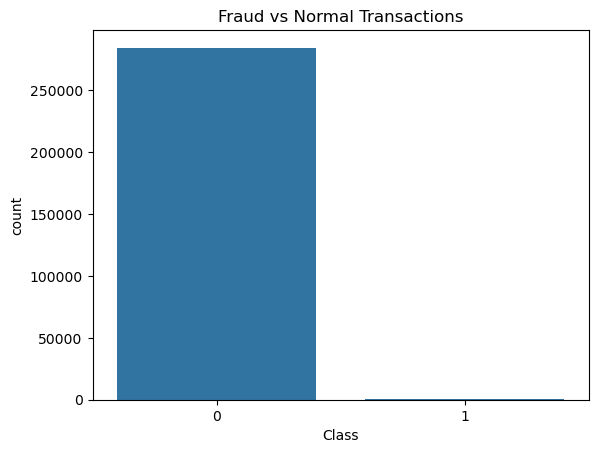

In [13]:
print(data['Class'].value_counts())

sns.countplot(x='Class', data=data)
plt.title("Fraud vs Normal Transactions")
plt.show()

In [14]:
selected_features = ['Time', 'Amount', 'V1', 'V2', 'V3']
X = data[selected_features]
Y = data['Class']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=2
)

In [15]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Training Accuracy
train_pred = model.predict(X_train)
print("Training Accuracy:", accuracy_score(Y_train, train_pred))

# Testing Accuracy
test_pred = model.predict(X_test)
print("Testing Accuracy:", accuracy_score(Y_test, test_pred))

print("\nClassification Report:\n")
print(classification_report(Y_test, test_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(Y_test, test_pred))

Training Accuracy: 0.998411200596897
Testing Accuracy: 0.9983848881710614

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.59      0.19      0.29        98

    accuracy                           1.00     56962
   macro avg       0.80      0.60      0.65     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:

[[56851    13]
 [   79    19]]


In [17]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)

In [18]:
pickle.dump(model, open("model.pkl", "wb"))